In [1]:
import pathlib
from xclim import subset
import xarray
import geopandas as gpd
from shapely.geometry import Point

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [6]:
data = pathlib.Path("/home/mlopez/EXEC/Processed Data Varibales/NorESM1-M_rcp85_tg_mean_annual.nc")
json = pathlib.Path("/home/mlopez/EXEC/GeoJsonMFFP/territoire_guide.geojson")

In [7]:
shape = gpd.read_file(json)
shape

,TER_GUIDE,geometry
0,1a,"MULTIPOLYGON (((-72.70926 46.28173, -72.69524 ..."
1,2a,"MULTIPOLYGON (((-76.08748 46.47438, -76.08807 ..."
2,2b,"MULTIPOLYGON (((-70.81729 47.01784, -70.81045 ..."
3,2c,"MULTIPOLYGON (((-72.38130 45.65191, -72.38112 ..."
4,3ab,"MULTIPOLYGON (((-79.06541 47.29977, -79.06474 ..."
5,3c,"MULTIPOLYGON (((-72.11272 47.05779, -72.11182 ..."
6,3d,"MULTIPOLYGON (((-69.62478 47.06785, -69.62615 ..."
7,4a,"MULTIPOLYGON (((-79.51813 48.09098, -79.50967 ..."
8,4bc,"MULTIPOLYGON (((-76.77250 48.04159, -76.77476 ..."
9,4de,"MULTIPOLYGON (((-72.55568 49.14672, -72.55771 ..."


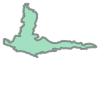

In [8]:
shape.geometry[1]

In [9]:
ds = xarray.open_dataset(data)
ds

<xarray.Dataset>
Dimensions:  (lat: 320, lon: 416, time: 151)
Coordinates:
  * time     (time) object 1950-01-01 00:00:00 ... 2100-01-01 00:00:00
  * lon      (lon) float32 -89.04521 -88.96188 -88.87855 ... -54.54659 -54.46326
  * lat      (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
Data variables:
    tg_mean  (time, lat, lon) float32 ...
Attributes:
    Conventions:     CF-1.5
    title:           NorESM1-M model output prepared for CMIP5 historical
    history:         2011-06-01T01:20:15Z CMOR rewrote data to comply with CF...
    institution:     Norwegian Climate Centre
    source:          NorESM1-M 2011  atmosphere: CAM-Oslo (CAM4-Oslo-noresm-v...
    redistribution:  Redistribution prohibited. For internal use only.

In [30]:
mask = subset.create_mask (x_dim=ds.lon, y_dim=ds.lat, poly=shape)

In [31]:
mask

<xarray.DataArray (lon: 416, lat: 320)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lon      (lon) float32 -89.04521 -88.96188 -88.87855 ... -54.54659 -54.46326
  * lat      (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104

In [63]:
mask.dims[0:2]

('lon', 'lat')

In [57]:
t1 = mask.dims[0]

In [58]:
t1

'lon'

In [56]:
t1[0]

'l'

In [66]:
for reg_name, reg_ds in zip(shape.TER_GUIDE, ds.tg_mean.groupby(mask.dims)):
    df = reg_ds.to_dataframe().reset_index()
    geom = [Point(x, y) for x, y in zip(df['lon'], df['lat'])]
    gdf = gpd.GeoDataFrame(df, geometry=geom)
    gdf.to_json(f"{reg_name}.json")

ValueError: Error parsing datetime string "lon" at position 0

In [10]:
nds = ds.indexes['time'].to_datetimeindex()
nds

DatetimeIndex(['1950-01-01', '1951-01-01', '1952-01-01', '1953-01-01',
               '1954-01-01', '1955-01-01', '1956-01-01', '1957-01-01',
               '1958-01-01', '1959-01-01',
               ...
               '2091-01-01', '2092-01-01', '2093-01-01', '2094-01-01',
               '2095-01-01', '2096-01-01', '2097-01-01', '2098-01-01',
               '2099-01-01', '2100-01-01'],
              dtype='datetime64[ns]', length=151, freq=None)

In [11]:
ds['time'] = nds
ds

<xarray.Dataset>
Dimensions:  (lat: 320, lon: 416, time: 151)
Coordinates:
  * time     (time) datetime64[ns] 1950-01-01 1951-01-01 ... 2100-01-01
  * lon      (lon) float32 -89.04521 -88.96188 -88.87855 ... -54.54659 -54.46326
  * lat      (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
Data variables:
    tg_mean  (time, lat, lon) float32 ...
Attributes:
    Conventions:     CF-1.5
    title:           NorESM1-M model output prepared for CMIP5 historical
    history:         2011-06-01T01:20:15Z CMOR rewrote data to comply with CF...
    institution:     Norwegian Climate Centre
    source:          NorESM1-M 2011  atmosphere: CAM-Oslo (CAM4-Oslo-noresm-v...
    redistribution:  Redistribution prohibited. For internal use only.

In [12]:
df = ds.to_dataframe().reset_index().dropna()
df 

,lat,lon,time,tg_mean
0,66.623306,-89.045212,1950-01-01,260.487122
1,66.623306,-89.045212,1951-01-01,259.087128
2,66.623306,-89.045212,1952-01-01,258.688416
3,66.623306,-89.045212,1953-01-01,257.983765
4,66.623306,-89.045212,1954-01-01,259.069092
...,...,...,...,...
20065630,40.041039,-74.045807,2096-01-01,289.984100
20065631,40.041039,-74.045807,2097-01-01,290.481293
20065632,40.041039,-74.045807,2098-01-01,290.068420
20065633,40.041039,-74.045807,2099-01-01,290.675110


In [15]:
%time geom = [Point(x, y) for x, y in zip(df['lon'], df['lat'])]
%time gdf = gpd.GeoDataFrame(df, geometry=geom)
gdf

,lat,lon,time,tg_mean,geometry
0,66.623306,-89.045212,1950-01-01,260.487122,POINT (-89.04521 66.62331)
1,66.623306,-89.045212,1951-01-01,259.087128,POINT (-89.04521 66.62331)
2,66.623306,-89.045212,1952-01-01,258.688416,POINT (-89.04521 66.62331)
3,66.623306,-89.045212,1953-01-01,257.983765,POINT (-89.04521 66.62331)
4,66.623306,-89.045212,1954-01-01,259.069092,POINT (-89.04521 66.62331)
...,...,...,...,...,...
20065630,40.041039,-74.045807,2096-01-01,289.984100,POINT (-74.04581 40.04104)
20065631,40.041039,-74.045807,2097-01-01,290.481293,POINT (-74.04581 40.04104)
20065632,40.041039,-74.045807,2098-01-01,290.068420,POINT (-74.04581 40.04104)
20065633,40.041039,-74.045807,2099-01-01,290.675110,POINT (-74.04581 40.04104)


In [14]:
poly = shape.geometry[1]
for point in gdf.geometry[1:gdf.shape[0] // 150]:
    if point.within(poly):
        print(point)


NameError: name 'gdf' is not defined

In [16]:
ss = subset.subset_shape(json, gdf, start_date='1950-01-01', end_date='1952-01-01')
ss

AttributeError: 'GeoDataFrame' object has no attribute 'startswith'

In [45]:
join = gpd.sjoin(shape, gdf)

In [46]:
join

IndexError: too many indices for array

Empty GeoDataFrame
Columns: [TER_GUIDE, geometry, index_right, lat, lon, time, tg_mean]
Index: []

In [ ]:

for i in ss:
    ds = xarray.open_dataset(i)
    df = ds.to_dataframe().reset_index()
    geom = [Point(x, y) for x, y in zip(df['lon'], df['lat'])]
    gdf = gpd.GeoDataFrame(df, geometry=geom)
    gdf.to_json(f"{i}.json")